In [1]:
# Analizowany dataset:
# https://www.kaggle.com/datasets/sulphatet/twitter-financial-news

### Etykiety:

"LABEL_0": "Analyst Update",

"LABEL_1": "Fed | Central Banks",

"LABEL_2": "Company | Product News",

"LABEL_3": "Treasuries | Corporate Debt",

"LABEL_4": "Dividend",

"LABEL_5": "Earnings",

"LABEL_6": "Energy | Oil",

"LABEL_7": "Financials",

"LABEL_8": "Currencies",

"LABEL_9": "General News | Opinion",

"LABEL_10": "Gold | Metals | Materials",

"LABEL_11": "IPO",

"LABEL_12": "Legal | Regulation",

"LABEL_13": "M&A | Investments",

"LABEL_14": "Macro",

"LABEL_15": "Markets",

"LABEL_16": "Politics",

"LABEL_17": "Personnel Change",

"LABEL_18": "Stock Commentary",

"LABEL_19": "Stock Movement"

In [2]:
# Wczytanie danych

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train_data.csv')

In [5]:
df2 = pd.read_csv('valid_data.csv')

In [6]:
df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
16985,KfW credit line for Uniper could be raised to ...,3
16986,KfW credit line for Uniper could be raised to ...,3
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3
16988,Global ESG bond issuance posts H1 dip as supra...,3


In [7]:
df2

,text,label
0,Analyst call of the day for @CNBCPro subscribe...,0
1,"Loop upgrades CSX to buy, says it's a good pla...",0
2,BofA believes we're already in a recession — a...,0
3,JPMorgan sees these derivative plays as best w...,0
4,Morgan Stanley's Huberty sees Apple earnings m...,0
...,...,...
4112,Dollar bonds of Chinese developers fall as str...,3
4113,Longer maturity Treasury yields have scope to ...,3
4114,Pimco buys €1bn of Apollo buyout loans from ba...,3
4115,Analysis: Banks' snubbing of junk-rated loan f...,3


In [8]:
# Połączmy dane

In [9]:
df = df.append(df2)

In [10]:
df = df.reset_index(drop=True)

In [11]:
df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
21102,Dollar bonds of Chinese developers fall as str...,3
21103,Longer maturity Treasury yields have scope to ...,3
21104,Pimco buys €1bn of Apollo buyout loans from ba...,3
21105,Analysis: Banks' snubbing of junk-rated loan f...,3


In [12]:
# Zapoznanie z danymi

In [13]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 100)
df.head()

,text,label
0,"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more https://t.co/QPN8Gwl7Uh",0
1,"Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says https://t.co/fLS2w57iCz",0
2,"Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition https://t.co/1EmtywmYpr",0
3,"Analysts react to Tesla's latest earnings, break down what's next for electric car maker https://t.co/kwhoE6W06u",0
4,"Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside https://t.co/jPpdl0D9s4",0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21107 entries, 0 to 21106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21107 non-null  object
 1   label   21107 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.9+ KB


In [15]:
# Zmienna celu to label - zerknijmy na jej zawartość

In [16]:
df['label'].value_counts()

2     4397
18    2646
14    2237
9     1893
16    1234
5     1229
1     1051
19    1020
7      784
6      670
15     626
17     607
12     606
13     587
4      456
3      398
0      328
8      198
10      82
11      58
Name: label, dtype: int64

In [17]:
# Zbiór danych nie jest zbalansowany - zwizualizujmy zawartość

Text(0.5, 1.0, 'Labels bar plot')

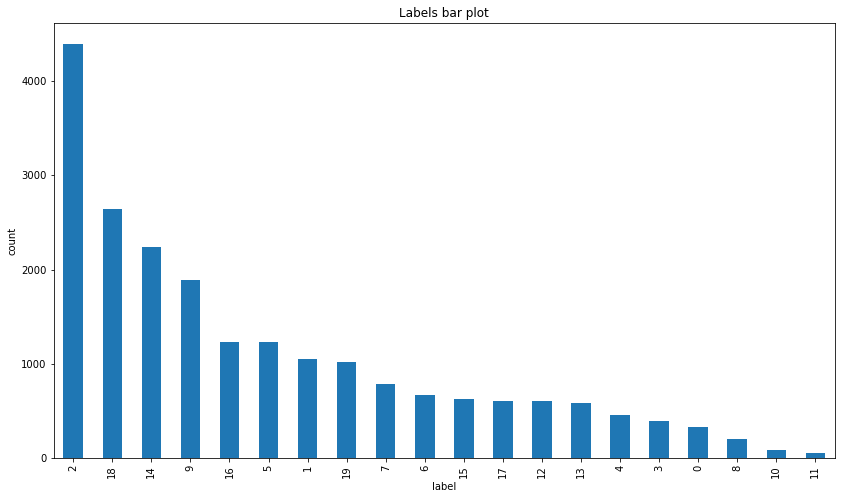

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
df['label'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('label')
plt.title('Labels bar plot')

In [20]:
# Dokonajmy analizy długości tekstu - zliczamy wyrazy

In [21]:
'aa pp'.split()

['aa', 'pp']

In [22]:
df['size'] = df['text'].apply(lambda a: len(a.split()))

In [23]:
df

,text,label,size
0,"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more https://t.co/QPN8Gwl7Uh",0,15
1,"Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says https://t.co/fLS2w57iCz",0,13
2,"Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition https://t.co/1EmtywmYpr",0,13
3,"Analysts react to Tesla's latest earnings, break down what's next for electric car maker https://t.co/kwhoE6W06u",0,15
4,"Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside https://t.co/jPpdl0D9s4",0,19
...,...,...,...
21102,Dollar bonds of Chinese developers fall as stress spreads from junk-rated names to investment-grade peers amid renewed concerns about more Covid lockdowns https://t.co/uhSv4iiR6C,3,23
21103,"Longer maturity Treasury yields have scope to go higher still and the market is erring in pricing in Fed interest-rate cuts in the latter part of 2023, according to Franklin Templeton https://t.co/KkTCLG66m2",3,32
21104,Pimco buys €1bn of Apollo buyout loans from banks https://t.co/nbgVPY34JA,3,10
21105,Analysis: Banks' snubbing of junk-rated loan funds worsens financing logjam https://t.co/Jl0EuExhB1 https://t.co/M8MuEzCPO1,3,12


In [24]:
# Czy mamy brakujące dane?
df.isna().sum()

text     0
label    0
size     0
dtype: int64

In [25]:
# W datasecie nie ma brakujących danych

In [26]:
len(df.iloc[0]['text'].split())

15

In [27]:
# Zerknijmy na histogram długości

Text(0.5, 1.0, 'Size histogram')

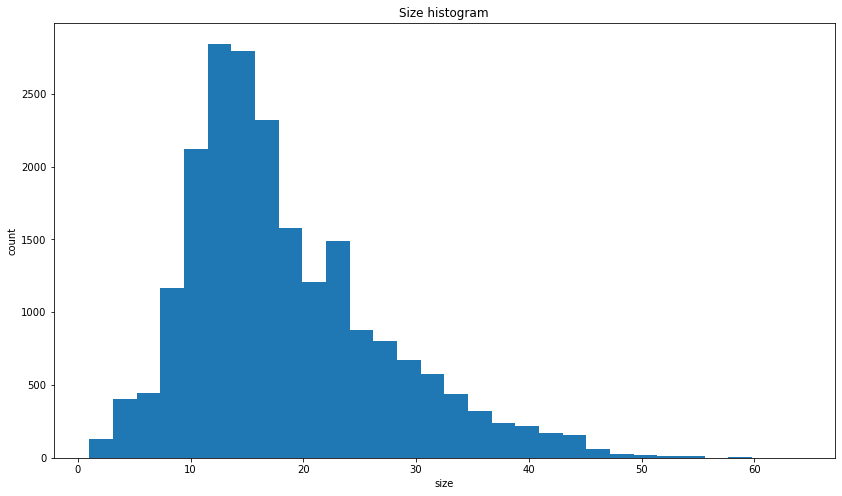

In [28]:
plt.figure(figsize=(14,8))
df['size'].plot.hist(bins=30)
plt.ylabel('count')
plt.xlabel('size')
plt.title('Size histogram')

In [29]:
# Dane składają się z wielu wyrazów - najczęściej jest to 10 - 20.

In [30]:
# Zerknijmy na wartości odstające

Text(0.5, 1.0, 'Size boxplot')

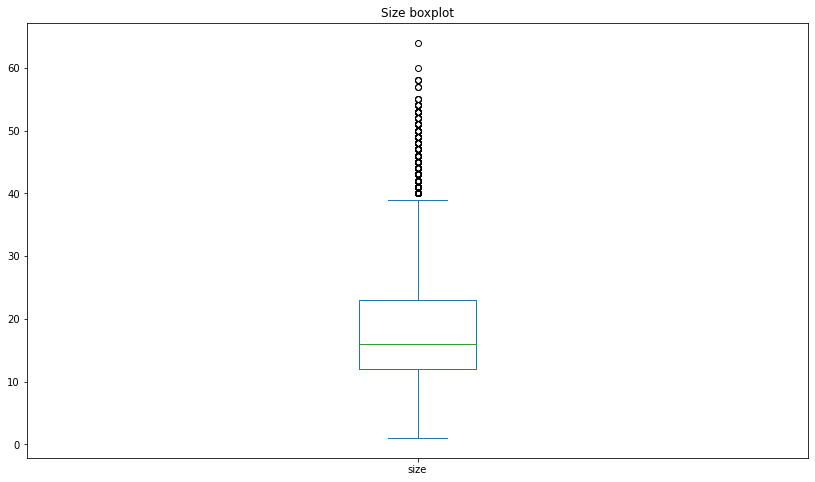

In [31]:
plt.figure(figsize=(14,8))
df['size'].plot.box()
plt.title('Size boxplot')

In [32]:
# Jako wartości odstające zaliczane są dane składające się z powyżej 40 wyrazów.

In [33]:
df['size'].describe()

count    21107.000000
mean        18.324584
std          8.703550
min          1.000000
25%         12.000000
50%         16.000000
75%         23.000000
max         64.000000
Name: size, dtype: float64

In [34]:
# Maksymalna liczba wyrazów w danych to 64, minimalna - 1. Średnio na rekord danych przypada 18 wyrazów z odchyleniem 
# standardowym równym ~9 wyrazów.

In [35]:
# Skośność

In [36]:
print(f"Skoścność: {df['size'].skew()}")

Skoścność: 1.0239217075988758


In [37]:
# Rozkład prawostronnie skośny.

In [38]:
# Wartości odstające mogą zdecydowanie utrudnić analizę - obejrzyjmy je z wykorzystaniem zscore

In [39]:
df['zscore'] = (df['size'] - df['size'].mean()) / df['size'].std()

In [40]:
df['zscore'].describe()

count    2.110700e+04
mean     1.668938e-16
std      1.000000e+00
min     -1.990519e+00
25%     -7.266672e-01
50%     -2.670846e-01
75%      5.371849e-01
max      5.247906e+00
Name: zscore, dtype: float64

In [41]:
# Jako wartości odstające zaliczamy zscore większy od 3 - zerknijmy na nie

In [42]:
outlayers = df[abs(df['zscore']) > 3]

Text(0.5, 1.0, 'outlayers bar plot')

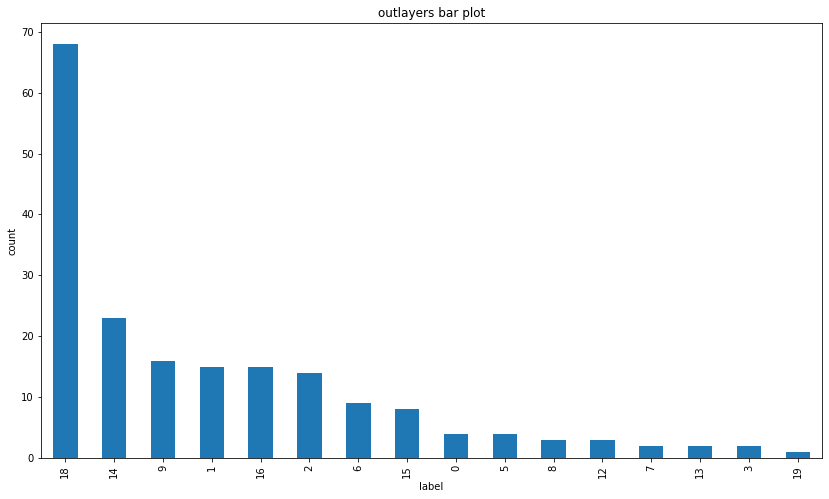

In [43]:
plt.figure(figsize=(14,8))
outlayers['label'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('label')
plt.title('outlayers bar plot')

In [44]:
# Najwięcej wartości odstających znajduje się w klasie 18. Zgodnie z opisem datasetu jest to Stock Commentary.

In [45]:
# Usuńmy dane odstające

In [46]:
df_no_outliers = df[abs(df['zscore']) <= 3]

In [47]:
# Dokonajmy również analizy liczby znaków w każdym tweecie

In [48]:
df['len'] = df['text'].apply(lambda a: len(a))

Text(0.5, 1.0, 'Length histogram')

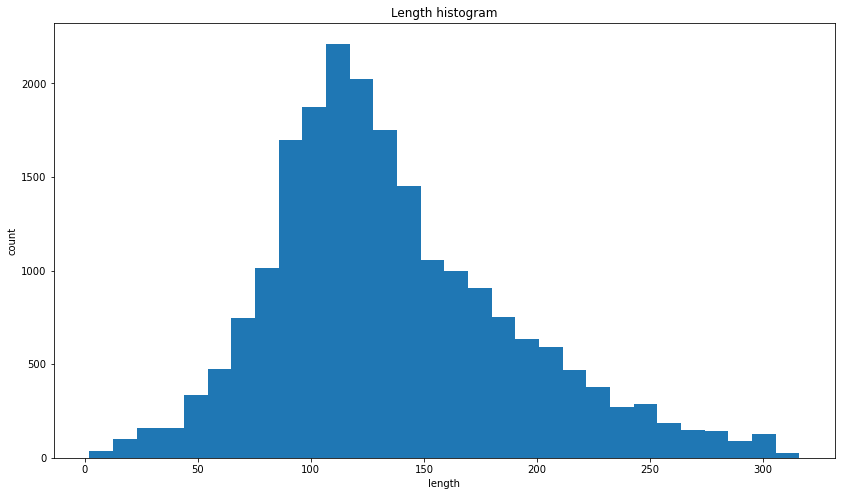

In [49]:
plt.figure(figsize=(14,8))
df['len'].plot.hist(bins=30)
plt.ylabel('count')
plt.xlabel('length')
plt.title('Length histogram')

In [50]:
print(f"Skoścność: {df['len'].skew()}")

Skoścność: 0.67490408413962


In [51]:
# Długość tweetów reprezentowana jest przez ~rozkład normalny.

In [52]:
# Zerknijmy jak rozkłada się długość tweetów zgodnie z etykietami

In [1]:
for label in range(len(df['label'].unique())):
    plt.figure(figsize=(14,8))
    df[df['label']==label]['len'].plot.hist(bins=30)
    plt.ylabel('count')
    plt.xlabel('length')
    plt.title(f'Length histogram, label: {label}')

NameError: name 'df' is not defined

In [54]:
for label in range(len(df['label'].unique())):
    print(label)
    print(df[df['label']==label]['len'].mean())

0
121.96036585365853
1
155.36631779257849
2
135.70229702069594
3
135.81658291457288
4
96.09429824561404
5
129.0113913751017
6
136.51641791044776
7
114.44260204081633
8
144.5151515151515
9
154.33069202324353
10
124.79268292682927
11
145.77586206896552
12
167.75907590759076
13
131.95400340715503
14
149.94099240053643
15
135.65814696485623
16
171.31199351701784
17
121.47281713344316
18
106.18102796674225
19
119.54117647058824


In [55]:
# Najniższa średnia długośc tweeta odnotowana została dla etykiety 4 (Dividend). Najdłuższa - dla etykiety 
# 12 (Legal | Regulation). Histogram dla etykiety 10 (Gold | Metals | Materials) wygląda dość nietypowo. 

In [56]:
# Przetwarzanie tekstu - preprocessing

In [57]:
# Zanim przejdziemy do budowy modeli dokonajmy usuwania znaków interpunkcyjnych oraz specjalnych (wliczając w to 
# URLe), wyczyśćmy tekst usuwając słowa przestankowe a na koniec dokonajmy lematyzacji (przywrócenia słów do ich podstawowej
# formy).

In [58]:
def preprocessing(text_data):
    # Małe litery
    text_data = text_data.lower()
    # https
    text_data = re.sub(r'http\S+', '', text_data)
    # Rodzielamy na wyrazy
    text_data = text_data.strip()
    # Wyrażenia regularne do usunięcia znaków przestankowych
    text_data=re.compile('<.*?>').sub('', text_data) 
    text_data = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text_data)  
    # Spacje
    text_data = re.sub('\s+', ' ', text_data) 
    # Cyfry
    text_data = re.sub(r'\[[0-9]*\]',' ',text_data) 
    text_data=re.sub(r'[^\w\s]', '', str(text_data).lower().strip())
    text_data = re.sub(r'\d',' ',text_data) 
    text_data = re.sub(r'\s+',' ',text_data) 
    return text_data

# Słowa przestankowe w języku angielskim
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [59]:
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marcin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marcin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marcin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
# Lematyzacja
lemmatizer = WordNetLemmatizer()

In [61]:
# Funkcja pomocnicza - mapowanie tagów NLTK
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [62]:
# Lematyzacja
def lemmatize(string):
    # Pobieramy tagi
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) 
    # Lematyzacja
    a=[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(a)

In [63]:
def full_processing(string):
    return lemmatize(stopword(preprocessing(string)))

In [64]:
import nltk
nltk.download('omw-1.4')  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Marcin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
df_no_outliers['clear_text'] = df_no_outliers['text'].apply(lambda a: full_processing(a))

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_no_outliers

,text,label,size,zscore,clear_text
0,"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more https://t.co/QPN8Gwl7Uh",0,15,-0.381980,thursday big analyst call apple amazon tesla palantir docusign exxon amp
1,"Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says https://t.co/fLS2w57iCz",0,13,-0.611772,buy la vegas sand travel singapore build well fargo say
2,"Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition https://t.co/1EmtywmYpr",0,13,-0.611772,piper sandler downgrade docusign sell cite elevated risk amid ceo transition
3,"Analysts react to Tesla's latest earnings, break down what's next for electric car maker https://t.co/kwhoE6W06u",0,15,-0.381980,analyst react tesla late earnings break next electric car maker
4,"Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside https://t.co/jPpdl0D9s4",0,19,0.077602,netflix peer set return growth analyst say give one stock upside
...,...,...,...,...,...
21102,Dollar bonds of Chinese developers fall as stress spreads from junk-rated names to investment-grade peers amid renewed concerns about more Covid lockdowns https://t.co/uhSv4iiR6C,3,23,0.537185,dollar bond chinese developer fall stress spread junk rat names investment grade peer amid renew concern covid lockdown
21103,"Longer maturity Treasury yields have scope to go higher still and the market is erring in pricing in Fed interest-rate cuts in the latter part of 2023, according to Franklin Templeton https://t.co/KkTCLG66m2",3,32,1.571246,long maturity treasury yield scope go high still market err price feed interest rate cut latter part accord franklin templeton
21104,Pimco buys €1bn of Apollo buyout loans from banks https://t.co/nbgVPY34JA,3,10,-0.956458,pimco buy bn apollo buyout loan bank
21105,Analysis: Banks' snubbing of junk-rated loan funds worsens financing logjam https://t.co/Jl0EuExhB1 https://t.co/M8MuEzCPO1,3,12,-0.726667,analysis bank snub junk rat loan fund worsen financing logjam


In [67]:
# Wektoryzacja - konwersja tekstu po lematyzacji na dane numeryczne

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [69]:
# Dzielimy dane na traningowe i testowe

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers['clear_text'] , df_no_outliers["label"],test_size=0.2,shuffle=True)

In [71]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [113]:
X_train_vectors_tfidf.shape

(6808, 11216)

In [72]:
# Modelowanie

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [74]:
# Las losowy
rnd_forest = RandomForestClassifier(n_estimators=1000)
rnd_forest.fit(X_train_vectors_tfidf, y_train)  

RandomForestClassifier(n_estimators=1000)

In [75]:
y_predict = rnd_forest.predict(X_test_vectors_tfidf)
print(classification_report(y_test, y_predict))
confussion_matrix_array = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.79      0.45      0.57        58
           1       0.85      0.85      0.85       213
           2       0.79      0.84      0.82       907
           3       0.88      0.64      0.74        70
           4       0.95      0.96      0.95        98
           5       0.84      0.96      0.90       227
           6       0.88      0.88      0.88       122
           7       0.89      0.81      0.85       156
           8       0.90      0.77      0.83        47
           9       0.66      0.72      0.69       386
          10       1.00      0.52      0.68        25
          11       0.90      0.60      0.72        15
          12       0.94      0.76      0.84       117
          13       0.88      0.59      0.71       106
          14       0.78      0.82      0.80       448
          15       0.88      0.65      0.75       132
          16       0.90      0.87      0.88       238
          17       0.84    

<AxesSubplot:>

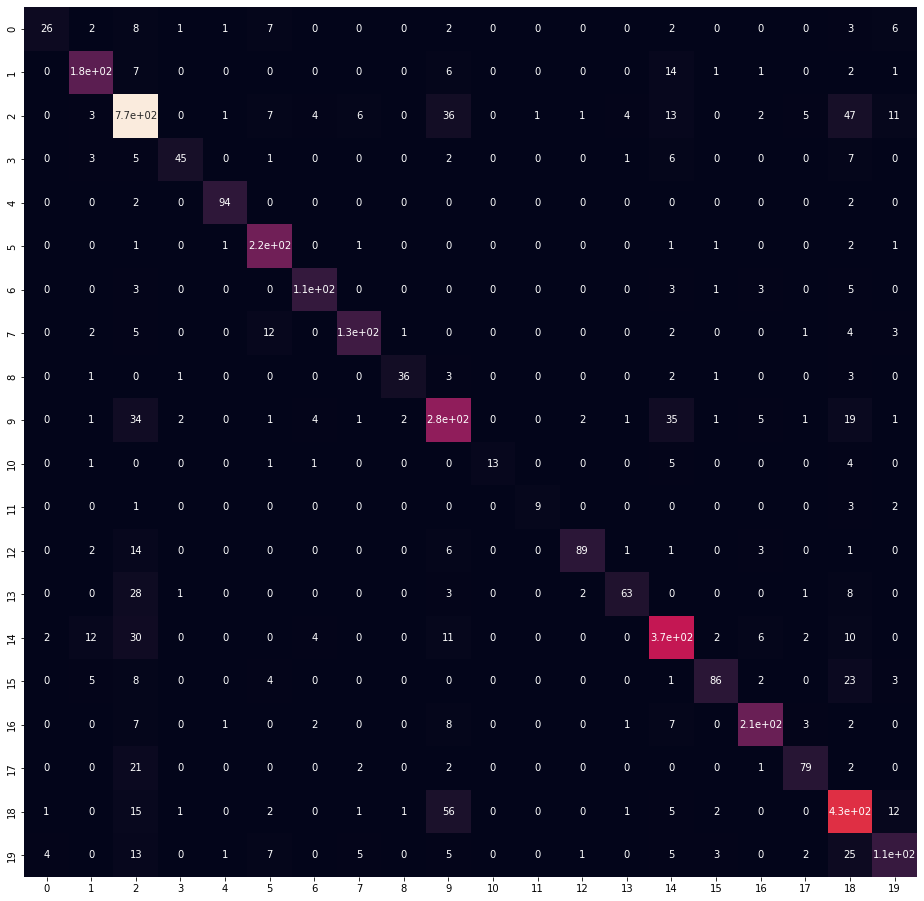

In [76]:
import seaborn as sns
df_cm = pd.DataFrame(confussion_matrix_array, index = [i for i in range(20)],
                  columns = [i for i in range(20)])
plt.figure(figsize = (16, 16))
sns.heatmap(df_cm, annot=True, cbar=False)

In [77]:
# Przypomnijmy sobie jakie klasy były najczęstsze

Text(0.5, 1.0, 'Labels bar plot')

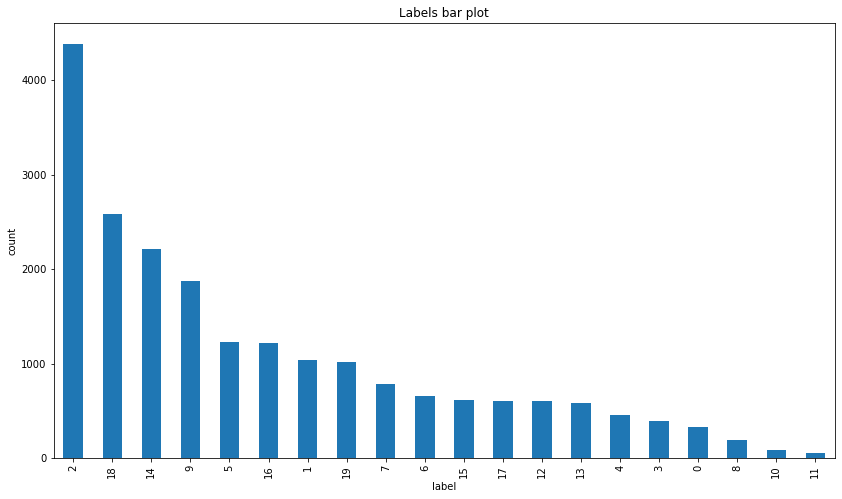

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
df_no_outliers['label'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('label')
plt.title('Labels bar plot')

In [79]:
# Bardzo łatwo zauważyć zdecydowaną przewagę danych z klasy 2 - jej licznośc powoduje to, że niektóre próbki
# klasyfikowane są błędnie jako własnie ta klasa (2). 

In [80]:
# Dokonajmy balansu klas:

In [81]:
# Zredukumy liczbę danych z każdej klasy do maksymalnie 500

In [82]:
def balance_dataset(df, max_count = 500):
    df_balanced = pd.DataFrame()
    labels = len(df['label'].unique())
    for label in range(labels):
        if len(df[df['label']==label]) >= max_count:
            df_balanced = df_balanced.append((df[df['label']==label]).sample(max_count))
        else:
            df_balanced = df_balanced.append(df[df['label']==label])
    
    return df_balanced.sample(frac=1).reset_index(drop=True)

In [83]:
df_balanced = balance_dataset(df_no_outliers, 500)

In [84]:
df_balanced['label'].value_counts()

9     500
19    500
14    500
13    500
15    500
1     500
16    500
6     500
5     500
17    500
18    500
7     500
2     500
12    500
4     456
3     396
0     324
8     195
10     82
11     58
Name: label, dtype: int64

In [85]:
df_balanced.head()

,text,label,size,zscore,clear_text
0,These are the worst airports in Europe for delays right now https://t.co/ZEGSi9CBzx https://t.co/QO9cPNxotR,9,13,-0.611772,bad airport europe delay right
1,Mining giant BHP Group has joined rival Rio Tinto Group in signaling more turbulence to come for commodities producers as costs balloon and demand for everything from iron ore to copper hits headwinds https://t.co/2d5G6kbLyK,6,34,1.801037,mining giant bhp group join rival rio tinto group signal turbulence come commodity producer cost balloon demand everything iron ore copper hit headwind
2,Wall Street banks holding about $80 billion in debt financing for LBOs are pushing to get the loans off their books as deadlines for acquisitions near https://t.co/NuXKoO7LTC,3,27,0.996767,wall street bank hold billion debt financing lbos push get loan book deadline acquisition near
3,"“We were as surprised as you were… one of the most powerful companies in the world took our identity without notice,"" Meta, an installation-art company, said Tuesday in a trademark-infringement lawsuit against the former Facebook. https://t.co/hUrdeIpr57",12,36,2.030828,surprised one powerful company world take identity without notice meta installation art company say tuesday trademark infringement lawsuit former facebook
4,The boss of UK digital bank Monzo said he’s targeting growth rather than immediate profit during a turbulent time for the fintech industry https://t.co/86qeKd3DDZ,2,24,0.652081,bos uk digital bank monzo say he target growth rather immediate profit turbulent time fintech industry


Text(0.5, 1.0, 'Balanced labels bar plot')

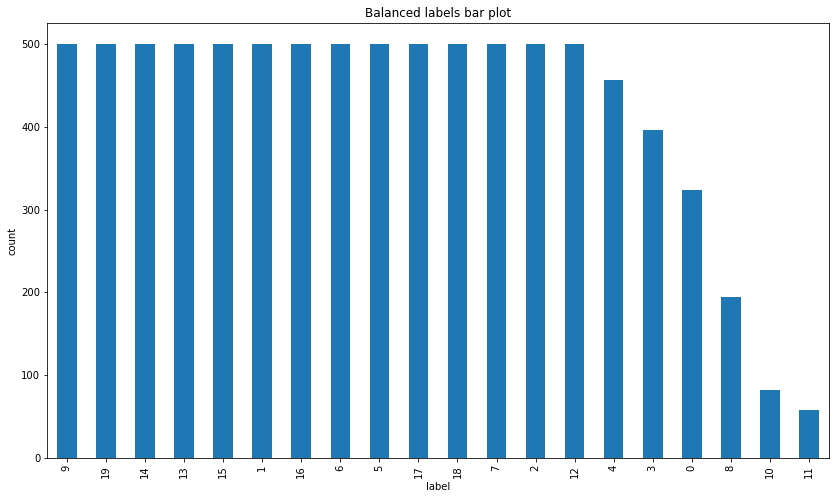

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
df_balanced['label'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('label')
plt.title('Balanced labels bar plot')

In [87]:
# Dane są zbalansowane, jednak klasy 8, 9, 10 znacząco odstają. Możemy je usunąć, dogenerować dane lub pozostawić tak
# jak jest - dysproporcja między klasami znacząco się zmniejszyła i z tego powodu zdecydowano, aby nie dokonywać 
# dalszych modyfikacji.

In [88]:
# Analogiczne procesy dla zbalansowanych danych

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['clear_text'] , df_balanced["label"],test_size=0.2,shuffle=True)

In [90]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [91]:
X_train_vectors_tfidf.shape

(6808, 11216)

In [92]:
X_test_vectors_tfidf.shape

(1703, 11216)

In [93]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8511 entries, 0 to 8510
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        8511 non-null   object 
 1   label       8511 non-null   int64  
 2   size        8511 non-null   int64  
 3   zscore      8511 non-null   float64
 4   clear_text  8511 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 332.6+ KB


In [94]:
# Las losowy
rnd_forest = RandomForestClassifier(n_estimators=100)
rnd_forest.fit(X_train_vectors_tfidf, y_train)  

RandomForestClassifier()

In [95]:
y_predict = rnd_forest.predict(X_test_vectors_tfidf)
print(classification_report(y_test, y_predict))
confussion_matrix_array = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        55
           1       0.78      0.76      0.77       103
           2       0.53      0.42      0.47        91
           3       0.91      0.83      0.87        84
           4       0.94      0.99      0.96        90
           5       0.86      0.96      0.91       100
           6       0.82      0.78      0.80        98
           7       0.83      0.84      0.84       113
           8       0.79      0.79      0.79        39
           9       0.60      0.41      0.49       100
          10       0.80      0.80      0.80        15
          11       1.00      0.90      0.95        10
          12       0.89      0.81      0.85       118
          13       0.78      0.74      0.76       100
          14       0.70      0.49      0.58        95
          15       0.76      0.77      0.77       100
          16       0.82      0.88      0.85       103
          17       0.74    

<AxesSubplot:>

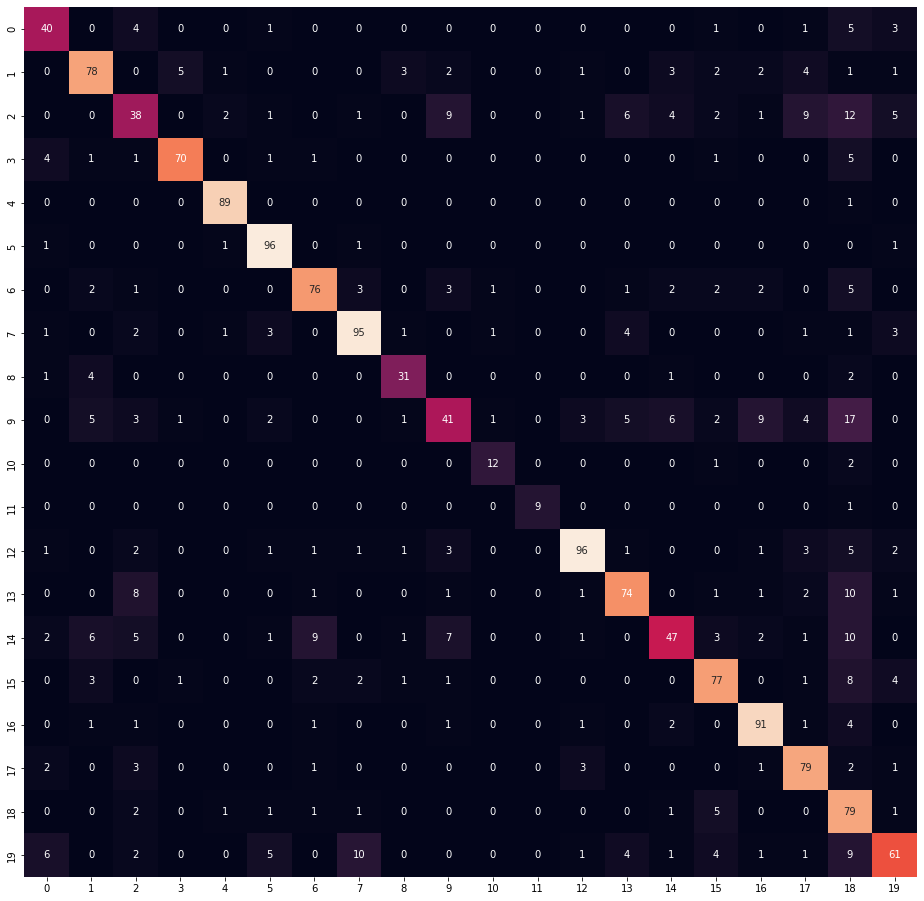

In [96]:
df_cm = pd.DataFrame(confussion_matrix_array, index = [i for i in range(20)],
                  columns = [i for i in range(20)])
plt.figure(figsize = (16, 16))
sns.heatmap(df_cm, annot=True, cbar=False)

In [97]:
# Bardzo dużo danych zostało błędnie sklasyfikowanych jako klasa 18 Stock Commentary. 
# Ma to jak najbardziej sens, ponieważ klasa te jest bardzo szeroka dziedziwnowo. 

In [98]:
# Nasze dane zawierają ponad 11 tysięcy kolumn. Spróbujmy wykorzystać SVD, aby zmniejszyć ich liczbę.

In [99]:
from sklearn.decomposition import TruncatedSVD

In [100]:
svd = TruncatedSVD()
x_train_svd = svd.fit_transform(X_train_vectors_tfidf)
x_test_svd = svd.transform(X_test_vectors_tfidf)

In [101]:
x_train_svd.shape

(6808, 2)

In [102]:
# Zobaczmy wariancję wyjaśnioną przez dwa komponenty

In [103]:
print(svd.explained_variance_ratio_.sum())

0.010354816374123044


In [104]:
# Jest bardzo niewielka - około 1%. Zwiększamy liczbę komponentów

In [105]:
svd = TruncatedSVD(n_components=3000)
x_train_svd = svd.fit_transform(X_train_vectors_tfidf)
x_test_svd = svd.transform(X_test_vectors_tfidf)

In [106]:
x_train_svd.shape

(6808, 3000)

In [107]:
print(svd.explained_variance_ratio_.sum())

0.8998662734338658


In [108]:
# Redukcja do 3000 kolumn pozwala na osiągnięcie wariancji wyjaśnionej na poziomie 90%.

In [109]:
# Las losowy
rnd_forest_svd = RandomForestClassifier(n_estimators=100)
rnd_forest_svd.fit(x_train_svd, y_train)  

RandomForestClassifier()

In [110]:
y_predict = rnd_forest_svd.predict(x_test_svd)
print(classification_report(y_test, y_predict))
confussion_matrix_array = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        55
           1       0.68      0.70      0.69       103
           2       0.27      0.40      0.32        91
           3       0.91      0.58      0.71        84
           4       0.93      0.98      0.95        90
           5       0.74      0.92      0.82       100
           6       0.70      0.76      0.73        98
           7       0.76      0.78      0.77       113
           8       0.78      0.46      0.58        39
           9       0.43      0.35      0.38       100
          10       0.88      0.47      0.61        15
          11       1.00      0.10      0.18        10
          12       0.86      0.71      0.78       118
          13       0.62      0.71      0.66       100
          14       0.53      0.43      0.47        95
          15       0.65      0.84      0.73       100
          16       0.73      0.83      0.78       103
          17       0.72    

<AxesSubplot:>

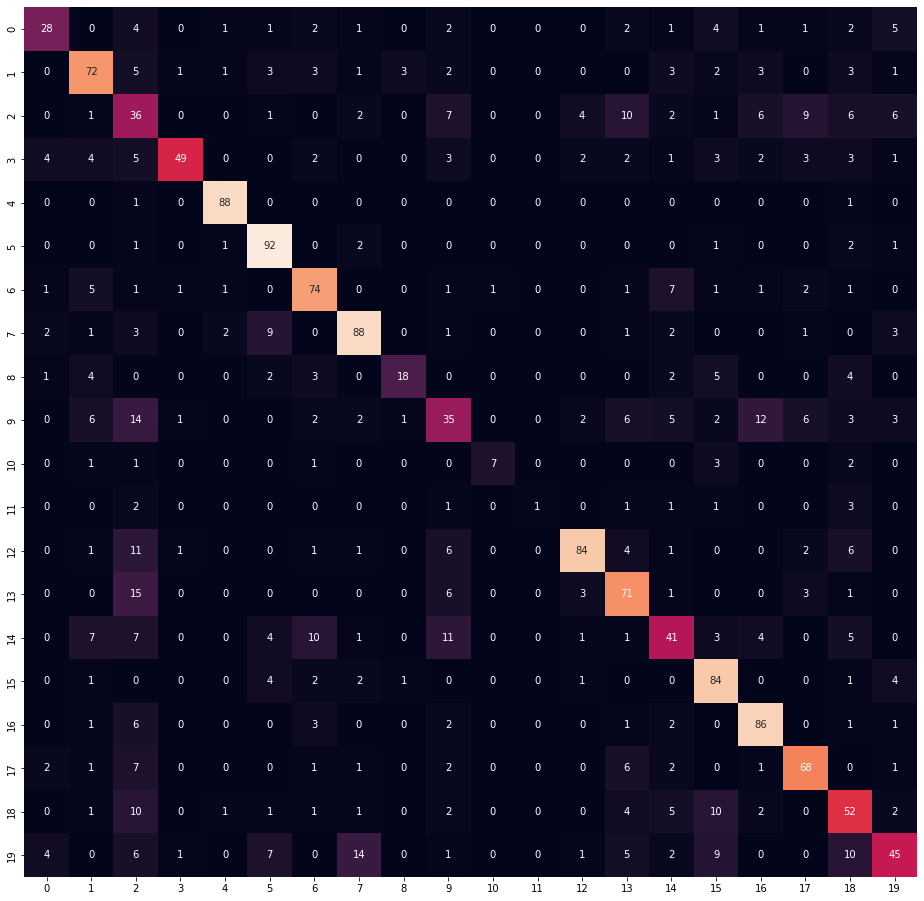

In [111]:
df_cm = pd.DataFrame(confussion_matrix_array, index = [i for i in range(20)],
                  columns = [i for i in range(20)])
plt.figure(figsize = (16, 16))
sns.heatmap(df_cm, annot=True, cbar=False)

In [112]:
# Redukcja wymiarów pozwoliła na zmniejszenie złożoności modelu, jednak accuracy spadło. Zwiększenie liczby komponentów
# pozwoliłoby na zwiększanie accuracy. SVD pozwala nam na redukcję wymiarowości danych przy zachowaniu informacji, które
# okreslone dane zawierają.